In [30]:
%matplotlib inline
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

OpenCV version: 4.2.0
<class 'bytes'> b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00x\x00x\x00\x00'
<class 'numpy.ndarray'>


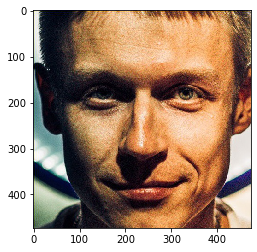

In [75]:
print('OpenCV version:', cv2.__version__)

# Load the cascade
face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
# Read the input image
fd = open('me.jpg', 'rb')
img_str = fd.read()
fd.close()
print(type(img_str), img_str[:20])
image = Image.open(io.BytesIO(img_str))
# print(img_str)
img = cv2.imdecode(np.frombuffer(img_str, np.float), 1)
print(type(img))
# img = cv2.imdecode()
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 0)
    # Save the output image
    cv2.imwrite('detected.jpg', img[y:y+h, x:x+w])
plt.imshow(plt.imread('detected.jpg'))

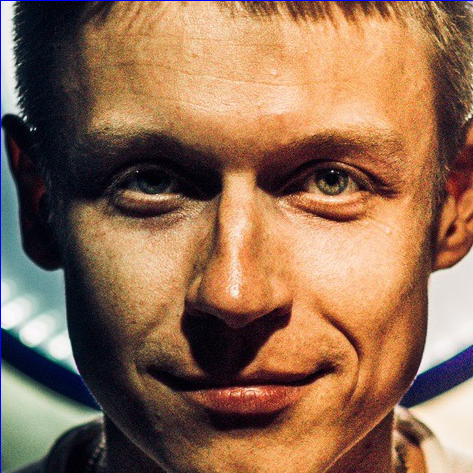

In [91]:
face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
fd = open('me.jpg', 'rb')
img_str = fd.read()
fd.close()
nparr = np.frombuffer(img_str, np.float)
img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray), plt.show()
faces = face_cascade.detectMultiScale(img, 1.1, 5)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 0)
    img = img[y:y+h, x:x+w]
    # Save the output image
#     cv2.imwrite('detected.jpg', img)
# plt.imshow(plt.imread('detected.jpg'))
Image.open(io.BytesIO(cv2.imencode('.png', img)[1]))

In [81]:
fd = open('me.jpg')
a = fd.read()
fd.close()
arr = np.frombuffer(a, np.uint8)
print(arr)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
plt.imshow(img)
# print(bytes(a, encoding='utf-8'))

UnicodeDecodeError: 'charmap' codec can't decode byte 0x98 in position 370: character maps to <undefined>

In [71]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('modelserver/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 0)
    # Save the output image
    cv2.imwrite('detected.jpg', img[y:y+h, x:x+w])
    img = img[y:y+h, x:x+w]
    
img

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [230, 233, 231],
        [232, 235, 233],
        ...,
        [162, 147, 175],
        [149, 156, 165],
        [172, 177, 186]],

       [[255,   0,   0],
        [230, 233, 231],
        [232, 235, 233],
        ...,
        [194, 180, 204],
        [181, 182, 192],
        [183, 182, 192]],

       ...,

       [[255,   0,   0],
        [ 56,  72,  49],
        [ 80,  96,  72],
        ...,
        [176, 209, 235],
        [162, 196, 220],
        [170, 202, 225]],

       [[255,   0,   0],
        [ 83, 100,  79],
        [ 81,  98,  77],
        ...,
        [179, 211, 240],
        [169, 200, 225],
        [180, 211, 236]],

       [[255,   0,   0],
        [ 82,  98,  80],
        [ 89, 105,  87],
        ...,
        [171, 202, 233],
        [171, 202, 227],
        [176, 206, 231]]

In [ ]:
# jpg_original = base64.b64decode(string)
# jpg_as_np = np.frombuffer(jpg_original, dtype=np.uint8)
# img = cv2.imdecode(jpg_as_np, flags=1)

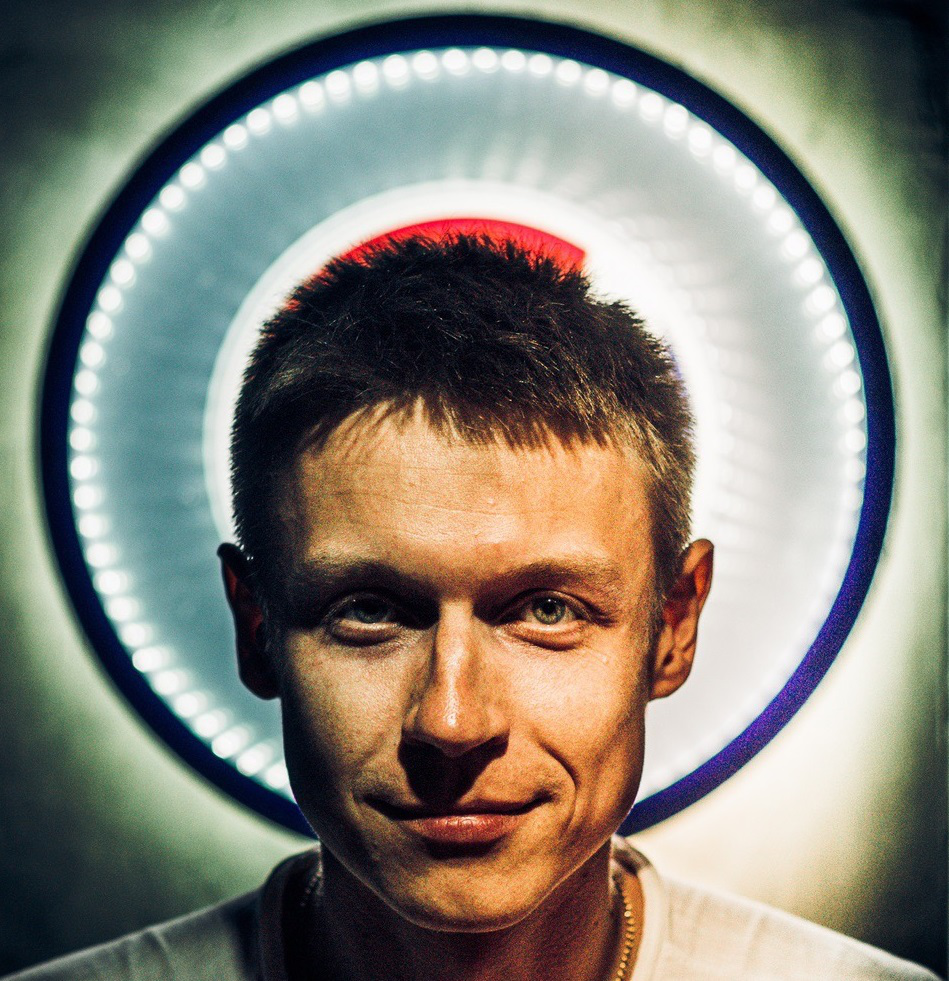

In [60]:
from io import BytesIO

with open('me.jpg', 'rb') as file:
    img = file.read()
Image.open(BytesIO(img))
# img = cv2.imdecode(np.frombuffer(img, np.uint8), cv2.IMREAD_COLOR)
# face_cascade = cv2.CascadeClassifier('webserver/haarcascade_frontalface_default.xml')
# faces = face_cascade.detectMultiScale(img, 1.1, 5)

In [57]:
!curl -X POST -F img_file=@me.jpg http://35.195.204.212/predict

{"detail":"Request failed after 100 tries"}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  349k    0     0  100  349k      0   227k  0:00:01  0:00:01 --:--:--  227k
100  349k    0     0  100  349k      0   137k  0:00:02  0:00:02 --:--:--  137k
100  349k    0     0  100  349k      0    98k  0:00:03  0:00:03 --:--:--   98k
100  349k    0     0  100  349k      0  78837  0:00:04  0:00:04 --:--:-- 78820
100  349k    0     0  100  349k      0  64589  0:00:05  0:00:05 --:--:-- 65309
100  349k    0     0  100  349k      0  54703  0:00:06  0:00:06 --:--:--     0
100  349k    0     0  100  349k      0  47448  0:00:07  0:00:07 --:--:--     0
100  349k    0     0  100  349k      0  41892  0:00:08  0:00:08 --:--:--     0
100  349k    0     0  100  349k      0  37501  0:00